<a href="https://colab.research.google.com/github/yuanshanmian/GZU_Courses/blob/main/EX4_YOLOv8_music_img_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 假设你的数据集在Google Drive的路径是 /content/drive/MyDrive/mydataset
!cp -r /content/drive/MyDrive/workbench/mydataset /content/
!cp -r /content/drive/MyDrive/workbench/mydata.yaml /content/mydata.yaml


Mounted at /content/drive


In [ ]:
%rm -r ./mydataset/enhanced_images/
%rm -r ./mydataset/enhanced_labels/

In [ ]:
%cp -r ./mydataset/enhanced_labels/ ./drive/MyDrive/a/
%cp -r ./mydataset/enhanced_images/ ./drive/MyDrive/a/

In [ ]:
pip install pillow numpy

### 进行旋转的图像增强

-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
-12.652996941767409
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
5.888916529186153
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
10.815663011814191
12.797449607782488
12.79744960778

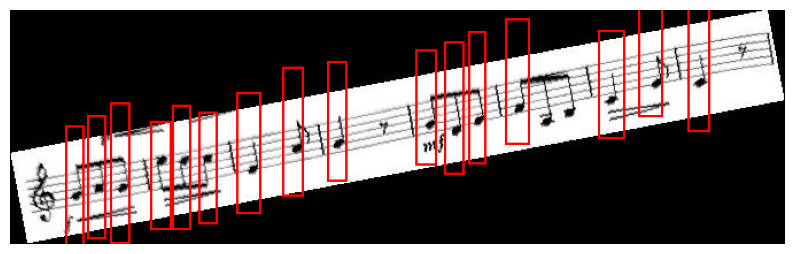

In [ ]:
import os
import random
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 文件夹路径
dataset_path = './mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 创建保存增强后图像和标签的目录
enhanced_images_path = os.path.join(dataset_path, 'enhanced_images')
enhanced_labels_path = os.path.join(dataset_path, 'enhanced_labels')
os.makedirs(enhanced_images_path, exist_ok=True)
os.makedirs(enhanced_labels_path, exist_ok=True)

# 函数：读取YOLO标签文件
def read_yolo_label(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file.readlines():
            parts = line.strip().split()
            label = {
                'class': int(parts[0]),
                'center_x': float(parts[1]),
                'center_y': float(parts[2]),
                'width': float(parts[3]),
                'height': float(parts[4])
            }
            labels.append(label)
        return labels

# 函数：保存YOLO标签文件
def save_yolo_label(label_path, labels):
    with open(label_path, 'w') as file:
        for label in labels:
            line = f"{label['class']} {label['center_x']} {label['center_y']} {label['width']} {label['height']}\n"
            file.write(line)

def rotate_bbox(center_x, center_y, width, height, angle, img_width, img_height):
    # 取反旋转角度
    angle = -angle
    print(angle)
    # 将中心坐标从归一化坐标转换为绝对坐标
    center_x_abs = center_x * img_width
    center_y_abs = center_y * img_height
    width_abs = width * img_width
    height_abs = height * img_height

    # 计算旋转后的中心点坐标
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # 图像中心点
    img_center_x = img_width / 2
    img_center_y = img_height / 2

    # 相对中心点坐标
    rel_center_x = center_x_abs - img_center_x
    rel_center_y = center_y_abs - img_center_y

    # 旋转后的相对坐标
    new_rel_center_x = rel_center_x * cos_theta - rel_center_y * sin_theta
    new_rel_center_y = rel_center_x * sin_theta + rel_center_y * cos_theta

    # 旋转后的绝对坐标
    new_center_x_abs = new_rel_center_x + img_center_x
    new_center_y_abs = new_rel_center_y + img_center_y

    # 将绝对坐标转换回归一化坐标
    new_center_x = new_center_x_abs / img_width
    new_center_y = new_center_y_abs / img_height

    return new_center_x, new_center_y, width, height


# 遍历图像文件夹
for image_file in os.listdir(images_path):
    if image_file.endswith('.png') or image_file.endswith('.jpg'):
        # 获取图像文件路径和对应的标签文件路径
        image_path = os.path.join(images_path, image_file)
        label_file = image_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_path, label_file)

        # 打开图像和读取标签文件内容
        image = Image.open(image_path)
        labels = read_yolo_label(label_path)

        # 随机旋转角度
        angle = random.uniform(-15, 15)  # 随机旋转角度在 -45 到 45 度之间
        rotated_image = image.rotate(angle, expand=True)
        img_width, img_height = rotated_image.size

        # 更新标签
        new_labels = []
        for label in labels:
            new_center_x, new_center_y, new_width, new_height = rotate_bbox(
                label['center_x'], label['center_y'], label['width'], label['height'],
                angle, img_width, img_height
            )
            new_labels.append({
                'class': label['class'],
                'center_x': new_center_x,
                'center_y': new_center_y,
                'width': new_width,
                'height': new_height
            })

        # 保存旋转后的图像和标签文件
        rotated_image_path = os.path.join(enhanced_images_path, 'rotated_' + image_file)
        rotated_image.save(rotated_image_path)
        rotated_label_path = os.path.join(enhanced_labels_path, 'rotated_' + label_file)
        save_yolo_label(rotated_label_path, new_labels)

# 随机选择一张旋转过的图片进行显示
random_image_file = random.choice(os.listdir(enhanced_images_path))
random_image_path = os.path.join(enhanced_images_path, random_image_file)
random_label_file = random_image_file.rsplit('.', 1)[0] + '.txt'
random_label_path = os.path.join(enhanced_labels_path, random_label_file)

# 打开随机选择的图像和读取标签
image = Image.open(random_image_path)
labels = read_yolo_label(random_label_path)

# 显示图像并绘制边界框
plt.figure(figsize=(10, 10))
plt.imshow(image)
draw = ImageDraw.Draw(image)

img_width, img_height = image.size
for label in labels:
    center_x = label['center_x'] * img_width
    center_y = label['center_y'] * img_height
    width = label['width'] * img_width
    height = label['height'] * img_height

    # 计算边界框的左上角和右下角坐标
    x_min = center_x - width / 2
    y_min = center_y - height / 2
    x_max = center_x + width / 2
    y_max = center_y + height / 2

    # 绘制边界框
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)

plt.imshow(image)
plt.axis('off')
plt.show()


### 进行亮度变化、对比度变化的图片增强

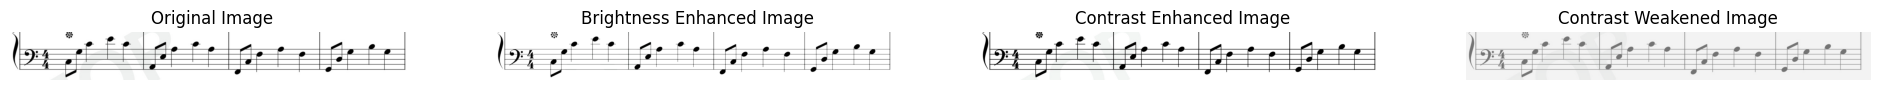

In [ ]:
import os
import random
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# 文件夹路径
dataset_path = './mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 增强参数
brightness_factor = 1.5  # 亮度增强因子
contrast_factor = 1.5    # 对比度增强因子
contrast_factor_weak = 0.5  # 对比度减弱因子

# 创建保存增强后图像和标签的目录
enhanced_images_path = os.path.join(dataset_path, 'enhanced_images')
enhanced_labels_path = os.path.join(dataset_path, 'enhanced_labels')
os.makedirs(enhanced_images_path, exist_ok=True)
os.makedirs(enhanced_labels_path, exist_ok=True)

# 存储增强后的图像以便后续显示
enhanced_images = []

# 遍历图像文件夹
for image_file in os.listdir(images_path):
    if image_file.endswith('.png') or image_file.endswith('.jpg'):
        # 获取图像文件路径和对应的标签文件路径
        image_path = os.path.join(images_path, image_file)
        label_file = image_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_path, label_file)

        # 打开图像和读取标签文件内容
        image = Image.open(image_path)
        with open(label_path, 'r') as f:
            label_content = f.read()

        # 亮度增强
        enhancer = ImageEnhance.Brightness(image)
        enhanced_image_brightness = enhancer.enhance(brightness_factor)
        enhanced_image_brightness_path = os.path.join(enhanced_images_path, 'brightness_' + image_file)
        enhanced_image_brightness.save(enhanced_image_brightness_path)
        with open(os.path.join(enhanced_labels_path, 'brightness_' + label_file), 'w') as f:
            f.write(label_content)

        # 对比度增强
        enhancer = ImageEnhance.Contrast(image)
        enhanced_image_contrast = enhancer.enhance(contrast_factor)
        enhanced_image_contrast_path = os.path.join(enhanced_images_path, 'contrast_' + image_file)
        enhanced_image_contrast.save(enhanced_image_contrast_path)
        with open(os.path.join(enhanced_labels_path, 'contrast_' + label_file), 'w') as f:
            f.write(label_content)

        # 对比度减弱
        enhancer = ImageEnhance.Contrast(image)
        enhanced_image_contrast_weak = enhancer.enhance(contrast_factor_weak)
        enhanced_image_contrast_weak_path = os.path.join(enhanced_images_path, 'contrast_weak_' + image_file)
        enhanced_image_contrast_weak.save(enhanced_image_contrast_weak_path)
        with open(os.path.join(enhanced_labels_path, 'contrast_weak_' + label_file), 'w') as f:
            f.write(label_content)

        # 将图像路径和增强图像添加到列表中以便后续展示
        enhanced_images.append((image, enhanced_image_brightness, enhanced_image_contrast, enhanced_image_contrast_weak))

# 随机选择一组图像进行展示
original_image, brightness_image, contrast_image, contrast_weak_image = random.choice(enhanced_images)

# 使用matplotlib显示图像
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(brightness_image)
axes[1].set_title('Brightness Enhanced Image')
axes[1].axis('off')

axes[2].imshow(contrast_image)
axes[2].set_title('Contrast Enhanced Image')
axes[2].axis('off')

axes[3].imshow(contrast_weak_image)
axes[3].set_title('Contrast Weakened Image')
axes[3].axis('off')

plt.show()
